In [3]:
import random
import pylab

Fraction with ~200 of mean = 0.9635190000000183


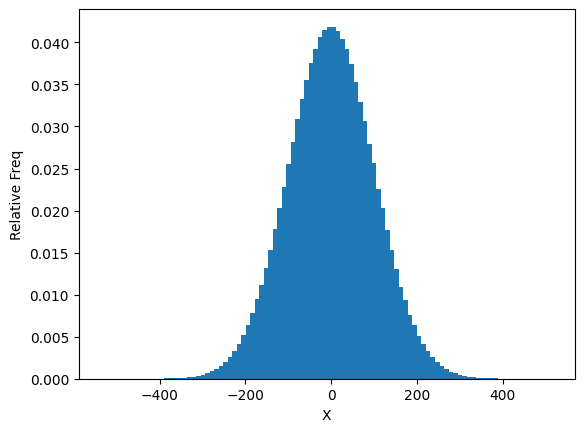

In [42]:
dist, numSamples = [], 5000000

for i in range(numSamples):
    dist.append(random.gauss(0,100))

weights = [1/numSamples]* len(dist) # Changes y axis

v=pylab.hist(dist, bins=100, weights=weights)

pylab.xlabel('X')
pylab.ylabel('Relative Freq')

print(f'Fraction with ~200 of mean = {sum(v[0][30:70])}')


In [43]:
v[1][30]

-220.41634729898544

In [44]:
v[1][70]

200.2235701116142

Text(0.5, 1.0, 'Normal Distribution, mu = 0, sigma = 1')

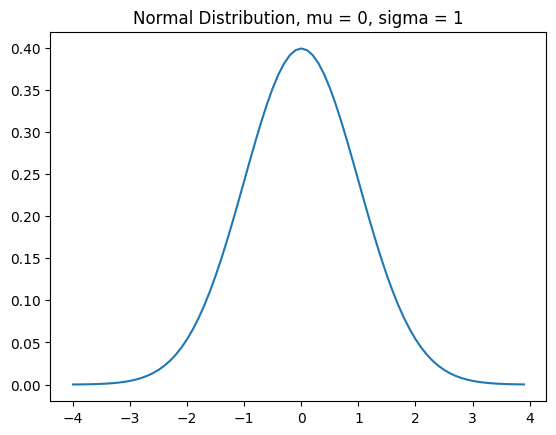

In [50]:
def gaussian(x, mu, sigma):
    factor1 = (1.0/(sigma*((2*pylab.pi)**0.5)))
    factor2 = pylab.e**-(((x-mu)**2)/(2*sigma**2))
    return factor1*factor2
# Gaussian Pdf formula

xVals, yVals = [], []
mu, sigma = 0, 1
x = -4
while x <= 4:
    xVals.append(x)
    yVals.append(gaussian(x, mu, sigma))
    x += 0.1
pylab.plot(xVals, yVals)
pylab.title('Normal Distribution, mu = ' + str(mu)\
        + ', sigma = ' + str(sigma))


In [51]:
import scipy.integrate

def checkEmpirical(numTrials):
  for t in range(numTrials):
     mu = random.randint(-10, 10)
     sigma = random.randint(1, 10)
     print('For mu =', mu, 'and sigma =', sigma)
     for numStd in (1, 1.96, 3):
        area = scipy.integrate.quad(gaussian,
                                    mu-numStd*sigma,
                                    mu+numStd*sigma,
                                    (mu, sigma))[0]
        print(' Fraction within', numStd,
              'std =', round(area, 4))

In [53]:
checkEmpirical(10)

For mu = 4 and sigma = 3
 Fraction within 1 std = 0.6827
 Fraction within 1.96 std = 0.95
 Fraction within 3 std = 0.9973
For mu = 2 and sigma = 10
 Fraction within 1 std = 0.6827
 Fraction within 1.96 std = 0.95
 Fraction within 3 std = 0.9973
For mu = 1 and sigma = 6
 Fraction within 1 std = 0.6827
 Fraction within 1.96 std = 0.95
 Fraction within 3 std = 0.9973
For mu = -3 and sigma = 8
 Fraction within 1 std = 0.6827
 Fraction within 1.96 std = 0.95
 Fraction within 3 std = 0.9973
For mu = -3 and sigma = 2
 Fraction within 1 std = 0.6827
 Fraction within 1.96 std = 0.95
 Fraction within 3 std = 0.9973
For mu = -3 and sigma = 5
 Fraction within 1 std = 0.6827
 Fraction within 1.96 std = 0.95
 Fraction within 3 std = 0.9973
For mu = -9 and sigma = 4
 Fraction within 1 std = 0.6827
 Fraction within 1.96 std = 0.95
 Fraction within 3 std = 0.9973
For mu = -8 and sigma = 9
 Fraction within 1 std = 0.6827
 Fraction within 1.96 std = 0.95
 Fraction within 3 std = 0.9973
For mu = 1 and sig

# Test CLT

In [74]:
def getMeanAndStd(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return mean, std

In [18]:
def stdDev(X):
    mean = sum(X)/float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    std = (tot/len(X))**0.5
    return std

In [75]:
def plotMeans(numDice, numRolls, numBins, legend, color, style):
   means = []
   for i in range(numRolls//numDice): #NumRolls divided by numDice and round down
       vals = 0
       for j in range(numDice):
           vals += 5*random.random() # random.random() gives random number between 0,1
       means.append(vals/float(numDice))
   pylab.hist(means, numBins, color = color, label = legend,
              weights = [1/len(means)]*len(means),
              hatch = style)
   return getMeanAndStd(means)

Mean of Rolling 1 die = 2.5000884740305964, Std = 1.4439116166420627
Mean of Rolling 20 die = 2.498765101720651, Std = 0.32395884458682395


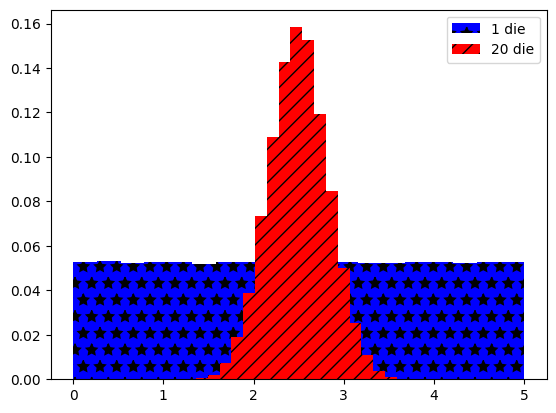

In [91]:
mean, std = plotMeans(1,1000000, 19, '1 die', 'b', '*')
print(f'Mean of Rolling 1 die = {mean}, Std = {std}')

mean, std = plotMeans(20,1000000, 19, '20 die', 'r', '//')
print(f'Mean of Rolling 20 die = {mean}, Std = {std}')
pylab.legend()

In [93]:
class FairRoulette():
    def __init__(self) -> None:
        self.pockets = []
        for i in range(1,37):
            self.pockets.append(i)
        self.ball = None
        # Probability of not getting it is 35/36
        self.pocketOdds = len(self.pockets) - 1

    def spin(self):
        self.ball = random.choice(self.pockets)

    def betPocket(self, pocket,amt):
        if str(pocket) == str(self.ball):
            return amt * self.pocketOdds
        else:
            return -amt
         
    def __str__(self):
        return 'Fair Roulette'

def playRoulette(game, numSpins, pocket, bet, toPrint):
    totPocket = 0
    for i in range(numSpins):
        game.spin()
        totPocket += game.betPocket(pocket, bet)
    if toPrint:
        print(numSpins, 'spins of', game)
        print('Expected return betting', pocket, '=',\
              str(100*totPocket/numSpins) + '%\n') # Expected Return per Spin is (money you get)/(# Spins)
    return (totPocket/numSpins)

def findPocketReturn(game, numTrials, trialSize, toPrint):
    pocketReturns = []
    for t in range(numTrials):
        trialVals = playRoulette(game, trialSize, 2, 1, toPrint) # Bet $1 in pocket 2
        pocketReturns.append(trialVals)
    return pocketReturns


Text(0, 0.5, 'Probability')

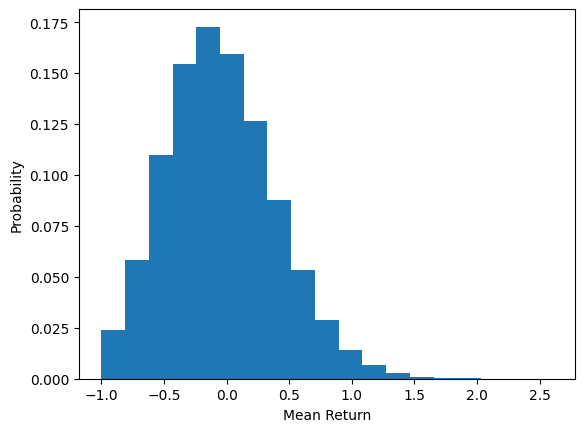

In [100]:
numTrials = 1000000
numSpins = 200
game = FairRoulette()
means = []

for i in range(numTrials):
    means.append(findPocketReturn(game, 1, numSpins, False)[0])
    # Bet 1$ in Roulette, do 1 time, 200 spins
    # Store the Return  

pylab.hist(means, bins=19, weights= [1/len(means)]* len(means))
pylab.xlabel('Mean Return')
pylab.ylabel('Probability')

In [19]:
def throwNeedles(numNeedles):
    #(pi*r^2)/ h*l = #Needle in circle/Total #Needle 
    #h=l=2; r=1
    #pi = 4 * (#Needle in circle/Total #Needle )
    inCircle = 0
    for Needles in range(1, numNeedles + 1, 1):
        x = random.random()
        y = random.random()
        if (x*x + y*y)**0.5 <= 1.0: #Equation of circle x^2 + y^2 <=r^2
            inCircle += 1
    return 4*(inCircle/float(numNeedles))

In [30]:
def getEst(numNeedle, numTrials):
    estimates = []
    for t in range(numTrials):
        piGuess = throwNeedles(numNeedle)
        estimates.append(piGuess)
    sDev = stdDev(estimates)
    curEst = sum(estimates) / len(estimates)
    print(f'Esti. = {curEst}, St Dev = {round(sDev,6)} \
          , Needles = {numNeedle}')
    return (curEst, sDev)

def estPi(precision, numTrials):
    numNeedles = 1000
    sDev = precision
    while sDev >= precision/2:
        curEst, sDev = getEst(numNeedles, numTrials)
        numNeedles *=2
    return curEst

In [32]:
estPi(0.001, 100)

Esti. = 3.143600000000002, St Dev = 0.049795           , Needles = 1000
Esti. = 3.1464400000000006, St Dev = 0.035329           , Needles = 2000
Esti. = 3.1406100000000006, St Dev = 0.026089           , Needles = 4000
Esti. = 3.141665000000001, St Dev = 0.018711           , Needles = 8000
Esti. = 3.140540000000002, St Dev = 0.013264           , Needles = 16000
Esti. = 3.141912499999999, St Dev = 0.010095           , Needles = 32000
Esti. = 3.14127375, St Dev = 0.006961           , Needles = 64000
Esti. = 3.1422571874999994, St Dev = 0.004677           , Needles = 128000
Esti. = 3.1413656249999984, St Dev = 0.002591           , Needles = 256000
Esti. = 3.141790781250001, St Dev = 0.002208           , Needles = 512000
Esti. = 3.1415653515625, St Dev = 0.001621           , Needles = 1024000
Esti. = 3.1417369140624993, St Dev = 0.001214           , Needles = 2048000
Esti. = 3.1415567871093755, St Dev = 0.000657           , Needles = 4096000
Esti. = 3.1415783837890614, St Dev = 0.000567    

3.1415766113281247

In [13]:
throwNeedles(1000000)

3.142952